In [27]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.io  
import random
import matplotlib.cm as cm
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.io #Used to load the OCTAVE *.mat files
import scipy.misc #Used to show matrix as an image
import matplotlib.cm as cm #Used to display images in a specific colormap
import random #To pick random images to display
from scipy.special import expit #Vectorized sigmoid function
from scipy import optimize as opt

In [28]:
os.chdir('C:/Users/JANMEJAY/Desktop/Machine Learning/Andrew NG/Python solutions of Andrew NG/CourseraML-master/ex3/data')

In [29]:
mat = scipy.io.loadmat('ex3data1.mat' )

In [30]:
type(mat)

dict

In [31]:
X, y = mat['X'], mat['y']

#Insert a column of 1's to X as usual
#X = np.insert(X,0,1,axis=1)
#y.shape
#X.shape

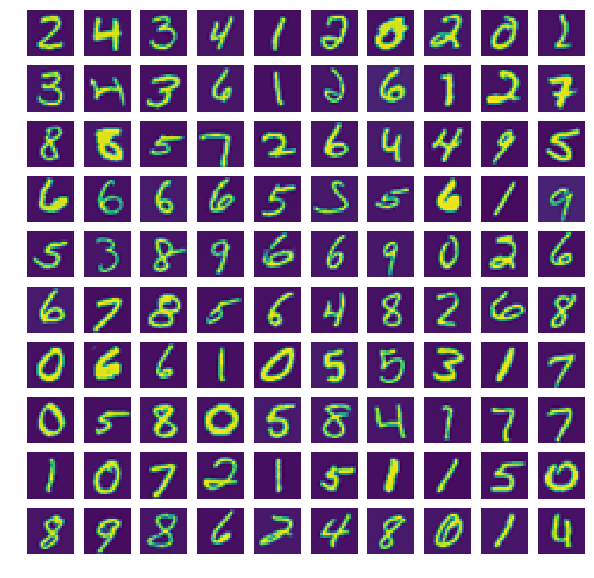

In [32]:
_, axarr = plt.subplots(10,10,figsize=(10,10))
for i in range(10):
    for j in range(10):
        axarr[i,j].imshow(X[np.random.randint(X.shape[0])].\
    reshape((20,20), order = 'F'))          
        axarr[i,j].axis('off')

In [33]:

m = len(y)
ones = np.ones((m,1))
X = np.hstack((ones, X)) #add the intercept
(m,n) = X.shape
def sigmoid(z):
    return 1/(1+np.exp(-z))

In [34]:
def costFunctionReg(theta, X, y, lmbda):
    m = len(y)
    temp1 = np.multiply(y, np.log(sigmoid(np.dot(X, theta))))
    temp2 = np.multiply(1-y, np.log(1-sigmoid(np.dot(X, theta))))
    return (np.sum(temp1) + np.sum(temp2)) / (-m) + np.sum(theta[1:]**2) * lmbda / (2*m)

In [35]:
def gradRegularization(theta, X, y, lmbda):
    m = len(y)
    temp = sigmoid(np.dot(X, theta)) - y
    temp = np.dot(temp.T, X).T / m + theta * lmbda / m
    temp[0] = temp[0] - theta[0] * lmbda / m
    return temp

In [36]:
lmbda = 0.1
k = 10
theta = np.zeros((k,n)) #inital parameters
for i in range(k):
    digit_class = i if i else 10
    theta[i] = opt.fmin_cg(f = costFunctionReg, x0 = theta[i],  fprime = gradRegularization, args = (X, (y == digit_class).flatten(), lmbda), maxiter = 50)

         Current function value: 0.009110
         Iterations: 50
         Function evaluations: 182
         Gradient evaluations: 182
         Current function value: 0.014043
         Iterations: 50
         Function evaluations: 185
         Gradient evaluations: 185
         Current function value: 0.056049
         Iterations: 50
         Function evaluations: 144
         Gradient evaluations: 144
         Current function value: 0.061962
         Iterations: 50
         Function evaluations: 139
         Gradient evaluations: 139
         Current function value: 0.037407
         Iterations: 50
         Function evaluations: 154
         Gradient evaluations: 154
         Current function value: 0.063101
         Iterations: 50
         Function evaluations: 132
         Gradient evaluations: 132
         Current function value: 0.020030
         Iterations: 50
         Function evaluations: 175
         Gradient evaluations: 175
         Current function value: 0.033517
      

In [37]:
theta.shape

(10, 401)

In [40]:
pred = np.argmax(X@theta.T, axis = 1)
pred = [e if e else 10 for e in pred]
np.mean(pred == y.flatten()) * 100

95.19999999999999

(5000, 10)